## Read a category file and make plots

This notebook should be run with py39

In [2]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pk
import umap
import seaborn
sys.path.append(os.path.join(os.getcwd(), "..", "code"))
from cluster_functions import callColor
from sklearn.decomposition import PCA
import glob
# import helper functions
#from cluster_functions import cluster_analysis, plot_groupings, callColor, fine_to_coarse

#%matplotlib widget

In [ ]:
if sys.version_info[0] < 3:
    print("Please use python 3")
if sys.version_info[1] < 6:
    PY35 = True
else:
    PY35 = False

In [ ]:
import glob
fns = glob.glob("../data/ephys/*_Population_vectors*.pkl")
for fn in fns:
    dfPopulationVectors = pd.read_pickle(fn)
    dfPopulationVectors.to_csv('/'.join(fn.split('/')[:-1])+"/Population_Vectors/"+fn.split('/')[-1][:-3]+"csv")

In [120]:
csv_fns = glob.glob('../data/ephys/Population_Vectors/*.csv')

In [121]:
csv_fns

['../data/ephys/Population_Vectors/YelBlu6903F_L1000R900_Population_vectors_50.csv',
 '../data/ephys/Population_Vectors/BlaBro09xxF_L2000R1600_Population_vectors_50.csv',
 '../data/ephys/Population_Vectors/WhiWhi4522M_L1500R1450_Population_vectors_50.csv',
 '../data/ephys/Population_Vectors/GreBlu9508M_L1100R1450_Population_vectors_50.csv',
 '../data/ephys/Population_Vectors/YelBlu6903F_L1200R1200_Population_vectors_50.csv',
 '../data/ephys/Population_Vectors/BlaBro09xxF_L2500R2300_Population_vectors_50.csv',
 '../data/ephys/Population_Vectors/GreBlu9508M_L1250R1650_Population_vectors_50.csv',
 '../data/ephys/Population_Vectors/BlaBro09xxF_L1500R1500_Population_vectors_50.csv']

## We will use Population_vectorks.pkl
This is generated in EPHYS1-Generate_Dataframes.ipynb

In [122]:
#dfPopulationVectors = pd.read_pickle('../data/ephys/Population_Vectors/BlaBro09xxF_L1500R1500_Population_vectors_50.csv')
dfPopulationVectors = pd.read_csv('../data/ephys/Population_Vectors/BlaBro09xxF_L1500R1500_Population_vectors_50.csv')

In [123]:
dfPopulationVectors.head()

Unnamed: 0                                        pop_vectors pv_labels  \
0           0  [ 60.  40.   0.  20.  40.  80.   0.  20.   0. ...      None   
1           1  [ 60.  20.  20.  20.  40.  80.   0.  20.   0. ...      None   
2           2  [ 60.  20.  20.  20.  40.  80.   0.  20.   0. ...      None   
3           3  [ 80.  20.  40.  20.  40.  80.  20.  20.   0. ...      None   
4           4  [ 80.  20.  40.   0.  40.  60.  20.  20.   0. ...      None   

                    source_labels  rel_time  window  
0  BlaBla0506_110302-DC-01_Trial0     -0.50     -46  
1  BlaBla0506_110302-DC-01_Trial0     -0.49     -45  
2  BlaBla0506_110302-DC-01_Trial0     -0.48     -44  
3  BlaBla0506_110302-DC-01_Trial0     -0.47     -43  
4  BlaBla0506_110302-DC-01_Trial0     -0.46     -42

In [9]:
maxs = []
for fn in np.unique(dfPopulationVectors.source_labels):
    maxs.append(dfPopulationVectors.window[dfPopulationVectors.source_labels==fn].max())
win_range = (5,np.min(maxs)-10)

In [24]:
st = df_reduced.pop_vectors.iloc[0]

In [ ]:
np.fromstring(''.join(st.split('\n'))[1:-1],dtype=np.float, sep=' ')

In [36]:
np.fromstring(''.join(st.split('\n'))[1:-1],dtype=np.float, sep=' ')

array([ 60.,  40.,  20.,  40.,  40.,  40.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,  20.,   0.,   0.,  60.,   0.,   0.,
         0.,   0.,   0.,   0.,  20.,   0.,   0.,   0.,   0.,  40.,   0.,
         0., 100.,  40.,   0.,   0.,   0.,   0.,  20.,  60.,  60.,  40.,
        20.,  40.,  40.])

In [40]:
#a = np.asarray(dfPopulationVectors.pop_vectors)
df_reduced = dfPopulationVectors[dfPopulationVectors.pv_labels != 'None'].copy()
df_reduced = df_reduced[(df_reduced.window <= win_range[1])&(df_reduced.window > win_range[0])]

#pop_vec_list = np.asarray(df_reduced.pop_vectors)
pop_vec_list = np.asarray([np.fromstring(''.join(pv.split('\n'))[1:-1],dtype=np.float, sep=' ') for pv in df_reduced.pop_vectors])
pop_vec_array = np.zeros((len(pop_vec_list),len(pop_vec_list[0])))
for i in range(len(pop_vec_list)):
    pop_vec_array[i,:] = pop_vec_list[i]

In [42]:
mean_vecs = []
mean_lbls = []
for fn in np.unique(df_reduced.source_labels):
    mean_vecs.append(pop_vec_array[df_reduced.source_labels==fn,:].mean(axis=0))
    mean_lbls.append(df_reduced.pv_labels[df_reduced.source_labels==fn].iloc[0])
mean_vecs = np.asarray(mean_vecs)

In [44]:
mean_vecs.shape

(2010, 47)

In [45]:
c = df_reduced.pv_labels

In [46]:
nc = 9

mean_pca = PCA(n_components=nc)
mean_ret = mean_pca.fit_transform(mean_vecs)
ret = mean_pca.transform(pop_vec_array)
meandict = dict({'lbls':mean_lbls})
for i in range(nc):
    meandict['PC%d'%(i+1)] = mean_ret[:,i]
    df_reduced['PC%d'%(i+1)] = ret[:,i]
df_means = pd.DataFrame(meandict)

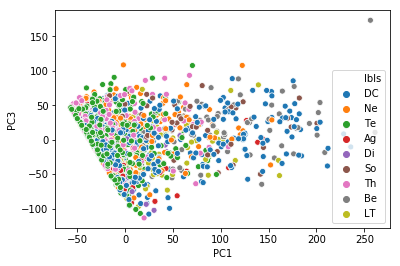

In [49]:
seaborn.scatterplot('PC1','PC3',hue='lbls',data=df_means)


In [48]:
#pca = PCA(n_components=5)
#ret = pca.transform(z)
##df_reduced['PC1'] = ret[:,0]
#df_reduced['PC2'] = ret[:,1]
#df_reduced['PC3'] = ret[:,2]
#df_reduced['PC4'] = ret[:,3]
#df_reduced['PC5'] = ret[:,4]

In [53]:
lines = dict()
lens_ln = []
for ct in np.unique(df_reduced.pv_labels):
    lines[ct] = dict({})
    for i in range(nc):
        lines[ct]['PC%d'%(i+1)] = []
for l in np.unique(df_reduced.source_labels):
    for pc in ['PC%d'%(i+1) for i in range(nc)]:
        lb = np.asarray(df_reduced[pc][df_reduced.source_labels == l])
        ct = df_reduced.pv_labels[df_reduced.source_labels == l].iloc[0]
        lines[ct][pc].append(lb)
        lens_ln.append(len(lb))

arrs = dict()
for ct in np.unique(df_reduced.pv_labels):
    arrs[ct] = dict()
    for i in range(nc):
        arrs[ct]['PC%d'%(i+1)] = []
    for pc in ['PC%d'%(i+1) for i in range(nc)]:
        a = np.zeros((len(lines[ct][pc]),max(lens_ln)))
        a[:] = np.nan
        for i,l in enumerate(lines[ct][pc]):
            a[i,:len(l)] = l
        arrs[ct][pc] = a
    #a = np.array(lines[ct])
    #plt.plot(np.array(lines[ct]).mean(axis=0),c=callColor[ct])

/auto/fhome/lthomas/.virtualenvs/py3_env/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/auto/fhome/lthomas/.virtualenvs/py3_env/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


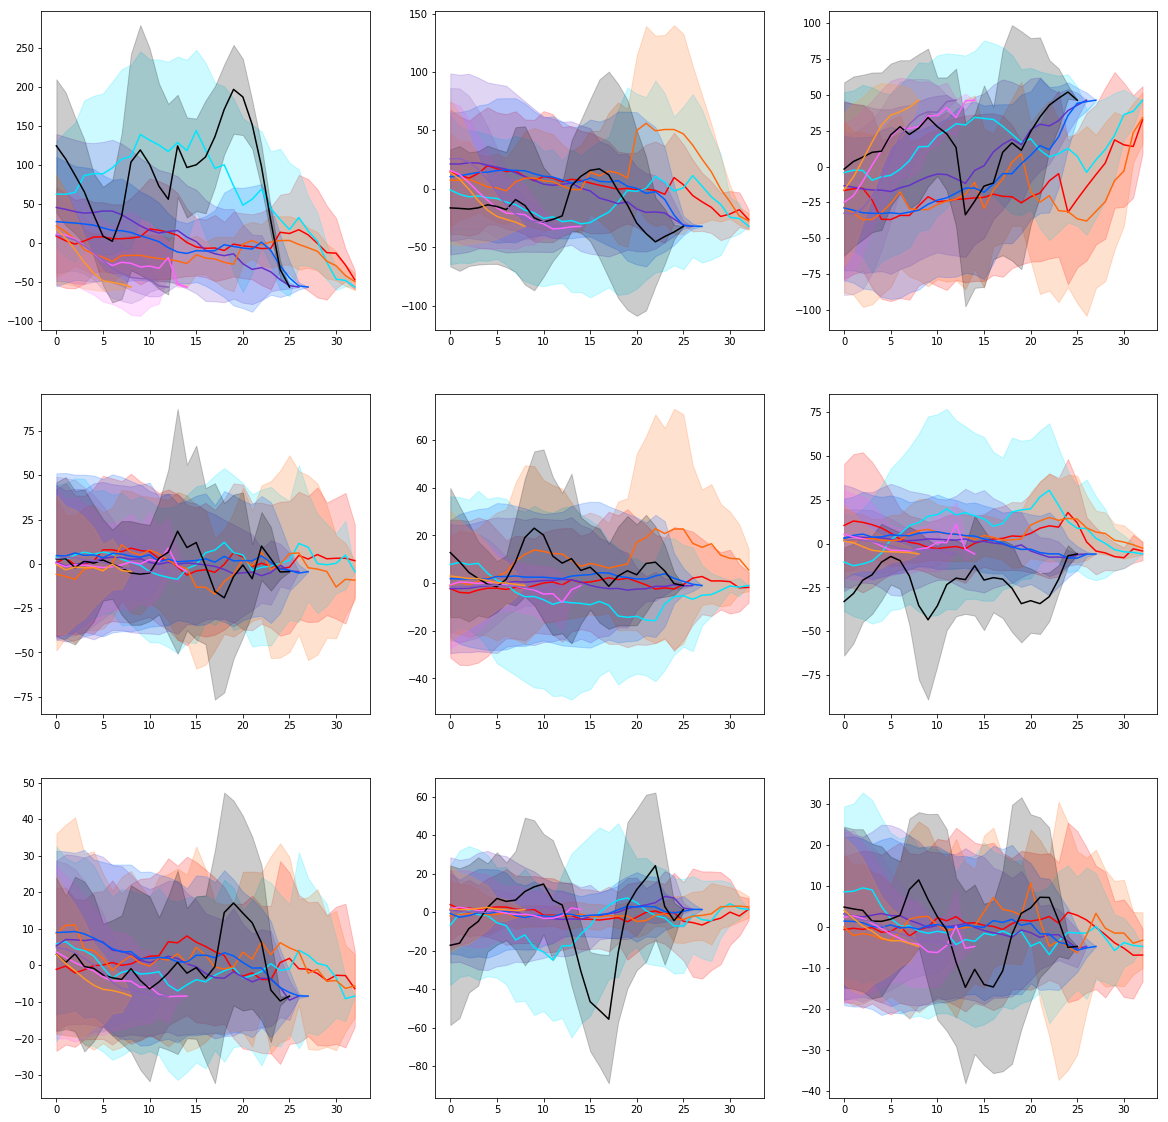

In [54]:
#for pc in ['PC%d'%(i+1) for i in range(nc)]:
#    plt.figure()
#    for ct in np.unique(df_reduced.pv_labels):
    
#        a = arrs[ct][pc]
#        m = np.nanmean(a,0)
#        s = np.nanstd(a,0)
#        plt.plot(m,c = callColor[ct])
#        plt.fill_between(np.arange(len(m)),m-s,m+s,color=callColor[ct],alpha=.2)

#plt.figure(1)
fig, axes = plt.subplots(3, 3,figsize=(20,20))
for i in range(3):
    for k in range(3):
        pc = 'PC%d'%(i*3+k+1)
        for ct in np.unique(df_reduced.pv_labels):
            a = arrs[ct][pc]
            m = np.nanmean(a,0)
            s = np.nanstd(a,0)
            axes[i][k].plot(m,c = callColor[ct])
            axes[i][k].fill_between(np.arange(len(m)),m-s,m+s,color=callColor[ct],alpha=.2)
plt.savefig("Figs/PCA_Components_time.png")

In [77]:
comb_ct = []
cts = []
for ct in np.unique(df_reduced.pv_labels):
    comb_Pcs = []
    for pc in ['PC%d'%(i+1) for i in range(nc)]:
        comb_Pcs.append( arrs[ct][pc])
    
    comb_Pcs = np.concatenate(comb_Pcs,axis=1)
    cts.extend([ct]*comb_Pcs.shape[0])
    comb_ct.append(comb_Pcs)
comb_ct = np.concatenate(comb_ct)

In [78]:
len(cts)

2010

In [19]:
%load_ext autoreload
%autoreload 2

In [66]:
len(comb_ct)

2010

In [56]:
comb_ct_nonan = comb_ct.copy()
comb_ct_nonan[np.isnan(comb_ct)] = 0
comb_pca = PCA(n_components=5)
trans_comb_pca = comb_pca.fit_transform(comb_ct_nonan)

In [40]:
umap.__file__

'/auto/fhome/lthomas/.virtualenvs/py39/lib/python3.9/site-packages/umap/__init__.py'

AttributeError: module 'umap' has no attribute 'UMAP'

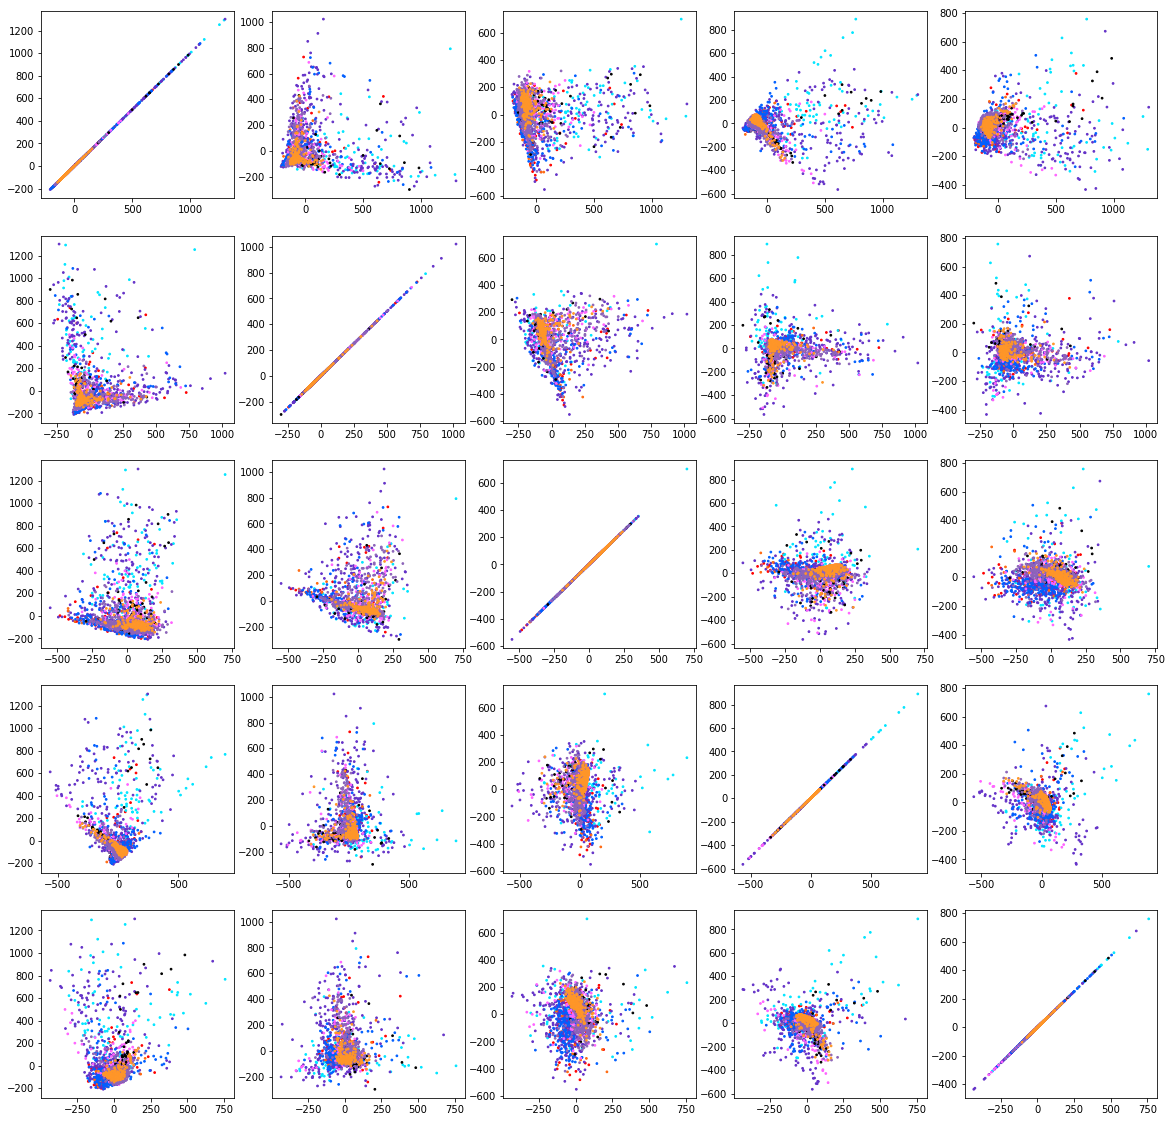

In [57]:
#plt.figure(1)
fig, axes = plt.subplots(5, 5,figsize=(20,20))
for i in range(5):
    for k in range(5):
        axes[i][k].scatter(trans_comb_pca[:,i],trans_comb_pca[:,k],c = [callColor[ct] for ct in cts],s=3)
plt.savefig("Figs/PCA_NeuralResp_concat.png")

In [80]:

from sklearn.preprocessing import StandardScaler
embedding = StandardScaler().fit_transform(pop_vec_array)
embedding.shape

(26490, 47)

In [90]:
um = umap.UMAP()
MesPCS = um.fit_transform(pop_vec_array)
MesPCS.shape

(26490, 2)

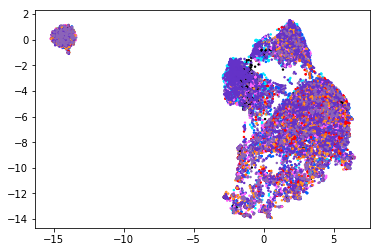

In [91]:
plt.scatter(MesPCS[:,0],MesPCS[:,1],c=[callColor[ct] for ct in df_reduced.pv_labels],s=2)

/auto/fhome/lthomas/.virtualenvs/py3_env/lib/python3.5/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


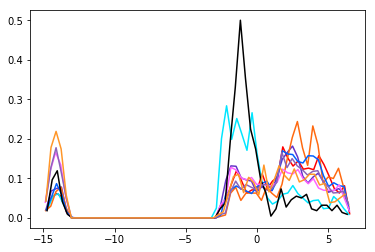

In [139]:
b = 60
for ct in np.unique(df_reduced.pv_labels):
    h,bn = np.histogram(MesPCS[df_reduced.pv_labels==ct,0],bins=60,normed=True)
    b = bn
    plt.plot(b[1:],h,c=callColor[ct])

In [92]:
lines = dict()
lens_ln = []
for ct in np.unique(df_reduced.pv_labels):
    lines[ct] = dict({})
    for i in range(2):
        lines[ct][i] = []
for l in np.unique(df_reduced.source_labels):
    for pc in range(2):
        lb = np.asarray(MesPCS[:,pc][df_reduced.source_labels == l])
        ct = df_reduced.pv_labels[df_reduced.source_labels == l].iloc[0]
        lines[ct][pc].append(lb)
        lens_ln.append(len(lb))

arrs = dict()
for ct in np.unique(df_reduced.pv_labels):
    arrs[ct] = dict()
    for i in range(2):
        arrs[ct][i] = []
    for pc in range(2):
        a = np.zeros((len(lines[ct][pc]),max(lens_ln)))
        a[:] = np.nan
        for i,l in enumerate(lines[ct][pc]):
            a[i,:len(l)] = l
        arrs[ct][pc] = a
    #a = np.array(lines[ct])
    #plt.plot(np.array(lines[ct]).mean(axis=0),c=callColor[ct])
fig, axes = plt.subplots(2, 1,figsize=(20,20))
fig.suptitle("UMAP", fontsize=30)
for i in range(2):
    pc = i
    plt.figure()
    for ct in np.unique(df_reduced.pv_labels):
        a = arrs[ct][pc]
        m = np.nanmean(a,0)
        s = np.nanstd(a,0)
        axes[i].plot(m,c = callColor[ct])
        axes[i].fill_between(np.arange(len(m)),m-s,m+s,color=callColor[ct],alpha=.2)
plt.savefig("Figs/PCA_Components_time.png")

In [129]:
process_csv(csv_fns[0])

Empty DataFrame
Columns: [Unnamed: 0, pop_vectors, pv_labels, source_labels, rel_time, window]
Index: []


ValueError: zero-size array to reduction operation minimum which has no identity

In [135]:

def process_csv_lite(fn):
    dfPopulationVectors = pd.read_csv(fn)
    base_name = '_'.join(fn.split('/')[-1].split('.')[0].split('_')[:2])
    print(dfPopulationVectors.head())
for fn in csv_fns:
    process_csv_lite(fn)

Empty DataFrame
Columns: [Unnamed: 0, pop_vectors, pv_labels, source_labels, rel_time, window]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, pop_vectors, pv_labels, source_labels, rel_time, window]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, pop_vectors, pv_labels, source_labels, rel_time, window]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, pop_vectors, pv_labels, source_labels, rel_time, window]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, pop_vectors, pv_labels, source_labels, rel_time, window]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, pop_vectors, pv_labels, source_labels, rel_time, window]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, pop_vectors, pv_labels, source_labels, rel_time, window]
Index: []
   Unnamed: 0                                        pop_vectors pv_labels  \
0           0  [ 60.  40.   0.  20.  40.  80.   0.  20.   0. ...      None   
1           1  [ 60.  20.  20.  20.  40.  80.   0.  20.   0. ...      None   
2           2  [ 60.  20.  20. 

In [133]:
def process_csv(fn):
    dfPopulationVectors = pd.read_csv(fn)
    base_name = '_'.join(fn.split('/')[-1].split('.')[0].split('_')[:2])
    print(dfPopulationVectors.head())
    # first figure out our window range
    maxs = []
    for fn in np.unique(dfPopulationVectors.source_labels):
        maxs.append(dfPopulationVectors.window[dfPopulationVectors.source_labels==fn].max())
    win_range = (5,np.min(maxs)-10)

    #only take pop vectors within that window range
    df_reduced = dfPopulationVectors[dfPopulationVectors.pv_labels != 'None'].copy()
    df_reduced = df_reduced[(df_reduced.window <= win_range[1])&(df_reduced.window > win_range[0])]

    #have to convert csvs from strings to numpy arrays
    pop_vec_list = np.asarray([np.fromstring(''.join(pv.split('\n'))[1:-1],dtype=np.float, sep=' ') for pv in df_reduced.pop_vectors])
    pop_vec_array = np.zeros((len(pop_vec_list),len(pop_vec_list[0])))
    for i in range(len(pop_vec_list)):
        pop_vec_array[i,:] = pop_vec_list[i]

    # Take some mean population vectors for each playback, these will be run with pca
    mean_vecs = []
    mean_lbls = []
    for fn in np.unique(df_reduced.source_labels):
        mean_vecs.append(pop_vec_array[df_reduced.source_labels==fn,:].mean(axis=0))
        mean_lbls.append(df_reduced.pv_labels[df_reduced.source_labels==fn].iloc[0])
    mean_vecs = np.asarray(mean_vecs)

    #run pca on the mean vectors
    nc = 9
    mean_pca = PCA(n_components=nc)
    mean_ret = mean_pca.fit_transform(mean_vecs)
    ret = mean_pca.transform(pop_vec_array)
    meandict = dict({'lbls':mean_lbls})
    for i in range(nc):
        meandict['PC%d'%(i+1)] = mean_ret[:,i]
        df_reduced['PC%d'%(i+1)] = ret[:,i]
    df_means = pd.DataFrame(meandict)

    lines = dict()
    lens_ln = []
    for ct in np.unique(df_reduced.pv_labels):
        lines[ct] = dict({})
        for i in range(nc):
            lines[ct]['PC%d'%(i+1)] = []
    for l in np.unique(df_reduced.source_labels):
        for pc in ['PC%d'%(i+1) for i in range(nc)]:
            lb = np.asarray(df_reduced[pc][df_reduced.source_labels == l])
            ct = df_reduced.pv_labels[df_reduced.source_labels == l].iloc[0]
            lines[ct][pc].append(lb)
            lens_ln.append(len(lb))

    arrs = dict()
    for ct in np.unique(df_reduced.pv_labels):
        arrs[ct] = dict()
        for i in range(nc):
            arrs[ct]['PC%d'%(i+1)] = []
        for pc in ['PC%d'%(i+1) for i in range(nc)]:
            a = np.zeros((len(lines[ct][pc]),max(lens_ln)))
            a[:] = np.nan
            for i,l in enumerate(lines[ct][pc]):
                a[i,:len(l)] = l
            arrs[ct][pc] = a
        #a = np.array(lines[ct])
        #plt.plot(np.array(lines[ct]).mean(axis=0),c=callColor[ct])

    fig, axes = plt.subplots(3, 3,figsize=(20,20))
    for i in range(3):
        for k in range(3):
            pc = 'PC%d'%(i*3+k+1)
            for ct in np.unique(df_reduced.pv_labels):
                a = arrs[ct][pc]
                m = np.nanmean(a,0)
                s = np.nanstd(a,0)
                axes[i][k].plot(m,c = callColor[ct])
                axes[i][k].fill_between(np.arange(len(m)),m-s,m+s,color=callColor[ct],alpha=.2)
    plt.savefig("Figs/PCA_Components_time_%s.png"%base_name)

    comb_ct_nonan = comb_ct.copy()
    comb_ct_nonan[np.isnan(comb_ct)] = 0
    comb_pca = PCA(n_components=5)
    trans_comb_pca = comb_pca.fit_transform(comb_ct_nonan)

    fig, axes = plt.subplots(5, 5,figsize=(20,20))
    for i in range(5):
        for k in range(5):
            axes[i][k].scatter(trans_comb_pca[:,i],trans_comb_pca[:,k],c = [callColor[ct] for ct in cts],s=3)
    plt.savefig("Figs/PCA_NeuralResp_concat_%s.png"%base_name)

    #Now UMAP
    um = umap.UMAP()
    MesPCS = um.fit_transform(pop_vec_array)
    plt.figure()
    plt.suptitle("UMAP Embedding")
    plt.scatter(MesPCS[:,0],MesPCS[:,1],c=[callColor[ct] for ct in df_reduced.pv_labels],s=2)
    plt.savefig("Figs/UMAP_embedding_%s.png"%base_name)

    lines = dict()
    lens_ln = []
    for ct in np.unique(df_reduced.pv_labels):
        lines[ct] = dict({})
        for i in range(2):
            lines[ct][i] = []
    for l in np.unique(df_reduced.source_labels):
        for pc in range(2):
            lb = np.asarray(MesPCS[:,pc][df_reduced.source_labels == l])
            ct = df_reduced.pv_labels[df_reduced.source_labels == l].iloc[0]
            lines[ct][pc].append(lb)
            lens_ln.append(len(lb))

    arrs = dict()
    for ct in np.unique(df_reduced.pv_labels):
        arrs[ct] = dict()
        for i in range(2):
            arrs[ct][i] = []
        for pc in range(2):
            a = np.zeros((len(lines[ct][pc]),max(lens_ln)))
            a[:] = np.nan
            for i,l in enumerate(lines[ct][pc]):
                a[i,:len(l)] = l
            arrs[ct][pc] = a
        #a = np.array(lines[ct])
        #plt.plot(np.array(lines[ct]).mean(axis=0),c=callColor[ct])
    fig, axes = plt.subplots(2, 1,figsize=(20,20))
    fig.suptitle("UMAP", fontsize=30)
    for i in range(2):
        pc = i
        plt.figure()
        for ct in np.unique(df_reduced.pv_labels):
            a = arrs[ct][pc]
            m = np.nanmean(a,0)
            s = np.nanstd(a,0)
            axes[i].plot(m,c = callColor[ct])
            axes[i].fill_between(np.arange(len(m)),m-s,m+s,color=callColor[ct],alpha=.2)
    plt.savefig("Figs/PCA_Components_time_%s.png"%base_name)

In [ ]:
fig, axes = plt.subplots(3, 3,figsize=(20,20))
for i in range(3):
    for k in range(3):
        pc = 'UMAP%d'%(i*3+k+1)
        for ct in np.unique(df_reduced.pv_labels):
            a = arrs[ct][pc]
            m = np.nanmean(a,0)
            s = np.nanstd(a,0)
            axes[i][k].plot(m,c = callColor[ct])
            axes[i][k].fill_between(np.arange(len(m)),m-s,m+s,color=callColor[ct],alpha=.2)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
seaborn.scatterplot('PC1','PC2',hue='pv_labels',data=df_reduced,ax=ax)
axcolor = 'lightgoldenrodyellow'
axt = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

st = Slider(axt, 'time', df_reduced['window'].min(), df_reduced['window'].max(), valinit=df_reduced['window'].min(), valstep=.01)


def update(val):
    t = st.val
    ax.clear()
    seaborn.scatterplot('PC1','PC2',hue='pv_labels',data=df_reduced[(df_reduced.window < t + .001) & (df_reduced.window > t - .001)],ax=ax)

    fig.canvas.draw_idle()


st.on_changed(update)


plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/auto/fhome/lthomas/.virtualenvs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyError: 'rel_time'

In [9]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2
cts, colors = np.unique(df_reduced.pv_labels,return_inverse=True)
ax.scatter(df_reduced.PC1, df_reduced.PC2, df_reduced.PC3,s=1.0,
           c=colors, marker='o',)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [30]:
ax.plot?

Signature: ax.plot(xs, ys, *args, zdir='z', **kwargs)
Docstring:
Plot 2D or 3D data.

Parameters
----------
xs : 1D array-like
    x coordinates of vertices.
ys : 1D array-like
    y coordinates of vertices.
zs : float or 1D array-like
    z coordinates of vertices; either one for all points or one for
    each point.
zdir : {'x', 'y', 'z'}, default: 'z'
    When plotting 2D data, the direction to use as z ('x', 'y' or 'z').
**kwargs
    Other arguments are forwarded to `matplotlib.axes.Axes.plot`.
File:      ~/.virtualenvs/py39/lib/python3.9/site-packages/mpl_toolkits/mplot3d/axes3d.py
Type:      method


AttributeError: module 'umap' has no attribute 'UMAP'

In [84]:
!pip uninstall umap

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /auto/fhome/lthomas/.virtualenvs/py39/lib/python3.9/site-packages/umap-0.1.1-py3.9.egg-info
    /auto/fhome/lthomas/.virtualenvs/py39/lib/python3.9/site-packages/umap/*
Proceed (y/n)? ^C
ERROR: Operation cancelled by user


In [11]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from IPython.display import HTML
# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

t = list(range(df_reduced.window.min(),df_reduced.window.max()))
ids = np.unique(df_reduced.source_labels)


# Initialize scatters
scatters = [ ax.scatter([df_reduced[(df_reduced.source_labels == idx)&(df_reduced.window==t[0])].PC1.iloc[0]],
                        [df_reduced[(df_reduced.source_labels == idx)&(df_reduced.window==t[0])].PC2.iloc[0]],
                        [df_reduced[(df_reduced.source_labels == idx)&(df_reduced.window==t[0])].PC3.iloc[0]], 
                        c=[callColor[df_reduced[(df_reduced.source_labels == idx)&(df_reduced.window==t[0])].pv_labels.iloc[0]]]) for idx in ids ]

# Number of iterations
iterations = t[-1]

# Setting the axes properties
ax.set_xlim3d([int(df_reduced.PC1.min()), int(df_reduced.PC1.max()+1)])
ax.set_xlabel('PC1')

ax.set_ylim3d([int(df_reduced.PC2.min()), int(df_reduced.PC2.max()+1)])
ax.set_ylabel('PC2')

ax.set_zlim3d([int(df_reduced.PC3.min()), int(df_reduced.PC3.max()+1)])
ax.set_zlabel('PC3')

#ax.set_title('3D Animated Scatter Example')

# Provide starting angle for the view.
ax.view_init(25, 10)

def animate_scatters(iteration, ids, scatters):
    """
    Update the data held by the scatter plot and therefore animates it.
    Args:
        iteration (int): Current iteration of the animation
        data (list): List of the data positions at each iteration.
        scatters (list): List of all the scatters (One per element)
    Returns:
        list: List of scatters (One per element) with new coordinates
    """
    for e,idx in enumerate(ids):
        row = df_reduced[(df_reduced.source_labels == idx)&(df_reduced.window==iteration)]
        if len(row) == 0:
            continue
        scatters[e]._offsets3d = ([row.iloc[0].PC1],[row.iloc[0].PC2],[row.iloc[0].PC3])
    return scatters

ani = animation.FuncAnimation(fig, animate_scatters, t[-1], fargs=( ids, scatters),
                                   interval=30, blit=False, repeat=True)
save=True
if save:
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800, extra_args=['-vcodec', 'libx264'])
    ani.save('3d-scatted-animated.mp4', writer=writer)


HTML(ani.to_jshtml())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [28]:
t = list(range(df_reduced.window.min(),df_reduced.window.max()))
ids = np.unique(df_reduced.source_labels)
# Attaching 3D axis to the figure
for lbl in np.unique(df_reduced.pv_labels):
    
    fig = plt.figure()
    ax = p3.Axes3D(fig)
    df_reduced_lbl = df_reduced[df_reduced.pv_labels == lbl]
    ids = np.unique(df_reduced_lbl.source_labels)

    x_y_z = [ ax.plot(df_reduced_lbl[df_reduced_lbl.source_labels == idx].PC1,
                            df_reduced_lbl[df_reduced_lbl.source_labels == idx].PC2,
                            df_reduced_lbl[df_reduced_lbl.source_labels == idx].PC3, 
                            c=callColor[lbl]) for idx in ids ]

    # Number of iterations
    iterations = t[-1]

    # Setting the axes properties
    ax.set_xlim3d([int(df_reduced.PC1.min()), int(df_reduced.PC1.max()+1)])
    ax.set_xlabel('PC1')

    ax.set_ylim3d([int(df_reduced.PC2.min()), int(df_reduced.PC2.max()+1)])
    ax.set_ylabel('PC2')

    ax.set_zlim3d([int(df_reduced.PC3.min()), int(df_reduced.PC3.max()+1)])
    ax.set_zlabel('PC3')

    #ax.set_title('3D Animated Scatter Example')

    # Provide starting angle for the view.
    ax.view_init(25, 10)
plt.show()


<ipython-input-28-f977df085733>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
fig = plt.figure()
ax = p3.Axes3D(fig)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

ValueError: input operand has more dimensions than allowed by the axis remapping

In [56]:

# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

def generate_data(nbr_iterations, nbr_elements):
    """
    Generates dummy data.
    The elements will be assigned random initial positions and speed.
    Args:
        nbr_iterations (int): Number of iterations data needs to be generated for.
        nbr_elements (int): Number of elements (or points) that will move.
    Returns:
        list: list of positions of elements. (Iterations x (# Elements x Dimensions))
    """
    dims = (3,1)

    # Random initial positions.
    gaussian_mean = np.zeros(dims)
    gaussian_std = np.ones(dims)
    start_positions = np.array(list(map(np.random.normal, gaussian_mean, gaussian_std, [nbr_elements] * dims[0]))).T

    # Random speed
    start_speed = np.array(list(map(np.random.normal, gaussian_mean, gaussian_std, [nbr_elements] * dims[0]))).T

    # Computing trajectory
    data = [start_positions]
    for iteration in range(nbr_iterations):
        previous_positions = data[-1]
        new_positions = previous_positions + start_speed
        data.append(new_positions)

    return data

def animate_scatters(iteration, data, scatters):
    """
    Update the data held by the scatter plot and therefore animates it.
    Args:
        iteration (int): Current iteration of the animation
        data (list): List of the data positions at each iteration.
        scatters (list): List of all the scatters (One per element)
    Returns:
        list: List of scatters (One per element) with new coordinates
    """
    for i in range(data[0].shape[0]):
        scatters[i]._offsets3d = (data[iteration][i,0:1], data[iteration][i,1:2], data[iteration][i,2:])
    return scatters

def main(data, save=True):
    """
    Creates the 3D figure and animates it with the input data.
    Args:
        data (list): List of the data positions at each iteration.
        save (bool): Whether to save the recording of the animation. (Default to False).
    """

    # Attaching 3D axis to the figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Initialize scatters
    scatters = [ ax.scatter(data[0][i,0:1], data[0][i,1:2], data[0][i,2:]) for i in range(data[0].shape[0]) ]

    # Number of iterations
    iterations = len(data)

    # Setting the axes properties
    ax.set_xlim3d([-50, 50])
    ax.set_xlabel('X')

    ax.set_ylim3d([-50, 50])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-50, 50])
    ax.set_zlabel('Z')

    ax.set_title('3D Animated Scatter Example')

    # Provide starting angle for the view.
    ax.view_init(25, 10)

    ani = animation.FuncAnimation(fig, animate_scatters, iterations, fargs=(data, scatters),
                                       interval=50, blit=False, repeat=True)

    if save:
        Writer = animation.writers['ffmpeg']
        writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800, extra_args=['-vcodec', 'libx264'])
        ani.save('3d-scatted-animated.mp4', writer=writer)

    plt.show()


data = generate_data(100, 2)
main(data, save=True)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [69]:
data[0][0,0:1]

array([0.97833925])

In [50]:
len(df_reduced[(df_reduced.source_labels == ids[0])&(df_reduced.window==13413413)])

0

In [59]:
t[-1]

63